In [48]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import folium
import csv
from bs4 import BeautifulSoup
import seaborn as sns
import project_lib
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [16]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
neighborhoods_data = newyork_data['features']
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)

In [17]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [24]:
website_url = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soup = BeautifulSoup(website_url,'lxml')
table = soup.find('table',{'class':'wikitable sortable'})
headers = [header.text for header in table.find_all('th')]

table_rows = table.find_all('tr')        
rows = []
for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)

with open('test.csv', 'w') as f:
   writer = csv.writer(f)
   writer.writerow(headers)
   writer.writerows(row for row in rows if row)
testdata=pd.read_csv('test.csv')
testdata.drop(testdata.columns[[7,8,9,10,11]], axis=1,inplace=True)
testdata.columns = testdata.columns.str.replace(' ', '')
testdata.columns = testdata.columns.str.replace('\'','')
testdata.rename(columns={'Borough':'persons_sq_mi','County':'persons_sq_km'}, inplace=True)
testdata

,NewYorkCitysfiveboroughsvte,Jurisdiction,Population,GrossDomesticProduct,Landarea,Density,persons_sq_mi,squarekm,persons/sq.mi,persons/km2
0,The Bronx\n,\n Bronx\n,"1,432,132\n",42.695\n,"29,200\n",42.10\n,109.04\n,NaN,NaN,NaN
1,Brooklyn\n,\n Kings\n,"2,582,830\n",91.559\n,"34,600\n",70.82\n,183.42\n,NaN,NaN,NaN
2,Manhattan\n,\n New York\n,"1,628,701\n",600.244\n,"360,900\n",22.83\n,59.13\n,NaN,NaN,NaN
3,Queens\n,\n Queens\n,"2,278,906\n",93.310\n,"39,600\n",108.53\n,281.09\n,NaN,NaN,NaN
4,Staten Island\n,\n Richmond\n,"476,179\n",14.514\n,"30,300\n",58.37\n,151.18\n,NaN,NaN,NaN
5,City of New York,"8,398,748",842.343,"97,700",302.64,783.83,"28,188",NaN,NaN,NaN
6,State of New York,"19,745,289","1,701.399","85,700","47,214","122,284",416.4,NaN,NaN,NaN
7,Sources:[14] and see individual borough articl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
testdata.rename(columns = {'NewYorkCitysfiveboroughsvte\n' : 'Borough',
                   'Jurisdiction\n':'County',
                   'Population\n':'Estimate_2017', 
                   'Landarea\n':'square_miles',
                    'Density\n':'square_km'}, inplace=True)
testdata

,Borough,County,Estimate_2017,GrossDomesticProduct,square_miles,square_km,persons_sq_mi,squarekm,persons/sq.mi,persons/km2
0,The Bronx\n,\n Bronx\n,"1,432,132\n",42.695\n,"29,200\n",42.10\n,109.04\n,NaN,NaN,NaN
1,Brooklyn\n,\n Kings\n,"2,582,830\n",91.559\n,"34,600\n",70.82\n,183.42\n,NaN,NaN,NaN
2,Manhattan\n,\n New York\n,"1,628,701\n",600.244\n,"360,900\n",22.83\n,59.13\n,NaN,NaN,NaN
3,Queens\n,\n Queens\n,"2,278,906\n",93.310\n,"39,600\n",108.53\n,281.09\n,NaN,NaN,NaN
4,Staten Island\n,\n Richmond\n,"476,179\n",14.514\n,"30,300\n",58.37\n,151.18\n,NaN,NaN,NaN
5,City of New York,"8,398,748",842.343,"97,700",302.64,783.83,"28,188",NaN,NaN,NaN
6,State of New York,"19,745,289","1,701.399","85,700","47,214","122,284",416.4,NaN,NaN,NaN
7,Sources:[14] and see individual borough articl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
testdata = testdata.fillna('')
testdata

,Borough,County,Estimate_2017,GrossDomesticProduct,square_miles,square_km,persons_sq_mi,squarekm,persons/sq.mi,persons/km2
0,The Bronx\n,\n Bronx\n,"1,432,132\n",42.695\n,"29,200\n",42.10\n,109.04\n,,,
1,Brooklyn\n,\n Kings\n,"2,582,830\n",91.559\n,"34,600\n",70.82\n,183.42\n,,,
2,Manhattan\n,\n New York\n,"1,628,701\n",600.244\n,"360,900\n",22.83\n,59.13\n,,,
3,Queens\n,\n Queens\n,"2,278,906\n",93.310\n,"39,600\n",108.53\n,281.09\n,,,
4,Staten Island\n,\n Richmond\n,"476,179\n",14.514\n,"30,300\n",58.37\n,151.18\n,,,
5,City of New York,"8,398,748",842.343,"97,700",302.64,783.83,"28,188",,,
6,State of New York,"19,745,289","1,701.399","85,700","47,214","122,284",416.4,,,
7,Sources:[14] and see individual borough articl...,,,,,,,,,


In [29]:
testdata.drop(testdata[((testdata.County == 'Sources:[14] and see individual borough articles'))].index)

,Borough,County,Estimate_2017,GrossDomesticProduct,square_miles,square_km,persons_sq_mi,squarekm,persons/sq.mi,persons/km2
0,The Bronx\n,\n Bronx\n,"1,432,132\n",42.695\n,"29,200\n",42.10\n,109.04\n,,,
1,Brooklyn\n,\n Kings\n,"2,582,830\n",91.559\n,"34,600\n",70.82\n,183.42\n,,,
2,Manhattan\n,\n New York\n,"1,628,701\n",600.244\n,"360,900\n",22.83\n,59.13\n,,,
3,Queens\n,\n Queens\n,"2,278,906\n",93.310\n,"39,600\n",108.53\n,281.09\n,,,
4,Staten Island\n,\n Richmond\n,"476,179\n",14.514\n,"30,300\n",58.37\n,151.18\n,,,
5,City of New York,"8,398,748",842.343,"97,700",302.64,783.83,"28,188",,,
6,State of New York,"19,745,289","1,701.399","85,700","47,214","122,284",416.4,,,
7,Sources:[14] and see individual borough articl...,,,,,,,,,


In [37]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0
client_9bb77dd2f344474a8a601eeef84ce309 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='p3UN95L4OTYnVjvqB0X8NG_i8Ewr8ZstmbvfT5uCOkjz',
    ibm_auth_endpoint="https://iam.eu-de.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_9bb77dd2f344474a8a601eeef84ce309.get_object(Bucket='myproject-donotdelete-pr-wpupeo2vlpsq3w',Key='DOHMH_New_York_City_Restaurant_Inspection_Results.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
df_data_0 = pd.read_csv(body)
df_data_0.head(20)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50087537,M & R DELI & HERO SHOP,Bronx,1200,MORRIS PARK AVE,10461.0,7182393200,Delicatessen,03/01/2019,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,43.0,NaN,NaN,03/31/2020,Pre-permit (Operational) / Initial Inspection,40.851068,-73.848548,211.0,13.0,28600.0,2045250.0,2.041200e+09,BX37
1,50001976,TROPICAL ISLE CARRIBEAN RESTAURANT,Queens,118-19,LIBERTY AVENUE,11419.0,7188484753,Caribbean,01/16/2020,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Y,25.0,NaN,NaN,03/31/2020,Cycle Inspection / Initial Inspection,40.686060,-73.824813,410.0,28.0,10600.0,4203688.0,4.095560e+09,QN55
2,41006323,PAPA JOHN'S,Queens,16202,UNION TURNPIKE,11366.0,7185917272,Pizza,06/22/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,13.0,NaN,NaN,03/31/2020,Cycle Inspection / Initial Inspection,40.721148,-73.805369,408.0,24.0,126500.0,4148492.0,4.068570e+09,QN38
3,50046011,BROOKLYN KETTLE,Brooklyn,420,PUTNAM AVE,11216.0,6462999499,Café/Coffee/Tea,08/17/2017,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Y,18.0,NaN,NaN,03/31/2020,Cycle Inspection / Initial Inspection,40.684616,-73.944838,303.0,36.0,26700.0,3322552.0,3.018290e+09,BK75
4,50048761,STARBUCKS COFFEE,Manhattan,1077,3RD AVE,10065.0,6468663442,Café/Coffee/Tea,10/19/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,4.0,A,10/19/2018,03/31/2020,Cycle Inspection / Initial Inspection,40.764286,-73.964572,108.0,4.0,11000.0,1043861.0,1.014180e+09,MN31
5,50075103,PQR,Manhattan,1631,2ND AVE,10028.0,9174357736,Pizza/Italian,09/27/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,12.0,A,09/27/2019,03/31/2020,Cycle Inspection / Re-inspection,40.776948,-73.952426,108.0,5.0,14601.0,1048742.0,1.015300e+09,MN32
6,50075290,OTTO'S TACOS,Manhattan,1568,3RD AVE,10128.0,9173882933,Mexican,06/26/2018,Violations were cited in the following area(s).,10H,Proper sanitization not provided for utensil w...,N,9.0,A,06/26/2018,03/31/2020,Pre-permit (Operational) / Re-inspection,40.780218,-73.952976,108.0,5.0,14802.0,1048084.0,1.015170e+09,MN40
7,40961653,FLOR DE MAYO RESTAURANT,Manhattan,2651,BROADWAY,10025.0,2126635520,Chinese/Cuban,11/04/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,32.0,NaN,NaN,03/31/2020,Cycle Inspection / Initial Inspection,40.797581,-73.969654,107.0,6.0,18700.0,1056487.0,1.018720e+09,MN12
8,50084024,CROWN FRIED CHICKEN,Brooklyn,308,TOMPKINS AVE,11216.0,9174985817,Chicken,05/16/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,13.0,A,05/16/2019,03/31/2020,Cycle Inspection / Re-inspection,40.687295,-73.944709,303.0,36.0,26500.0,3050961.0,3.018090e+09,BK75
9,50071598,TOMORROW,Manhattan,200,WATER ST,10038.0,9178031773,Chinese,11/09/2017,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,26.0,NaN,NaN,03/31/2020,Pre-permit (Non-operational) / Initial Inspection,40.707310,-74.004271,101.0,1.0,1502.0,1001163.0,1.000750e+09,MN25


In [46]:
df_data_0.rename(columns={'CUISINE DESCRIPTION':'CUISINE DESCRIPTION'}, inplace=True)
df_data_0['CUISINE DESCRIPTION'].value_counts().to_frame()

,CUISINE DESCRIPTION
American,83424
Chinese,42348
Café/Coffee/Tea,19844
"Latin (Cuban, Dominican, Puerto Rican, South & Central American)",17643
Pizza,17448
Mexican,16693
Italian,16229
Caribbean,14493
Japanese,14457
Bakery,12493


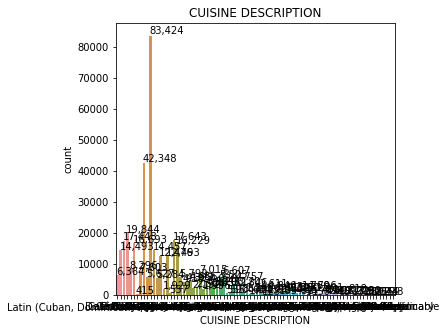

In [49]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='CUISINE DESCRIPTION',data=df_data_0)
ax.set_title("CUISINE DESCRIPTION")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show();

In [73]:
df_data_1 = df_data_0[df_data_0['CUISINE DESCRIPTION'] == 'American'].copy()
df_data_1 ['SCORE'] = df_data_0['DBA'].map(lambda x: str(x).strip())
df_data_1.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
11,41317594,MARK FORGIONE,Manhattan,134,READE STREET,10013.0,2129419401,American,09/12/2018,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Y,MARK FORGIONE,B,09/12/2018,03/31/2020,Cycle Inspection / Re-inspection,40.716392,-74.009650,101.0,1.0,3900.0,1079166.0,1.001410e+09,MN24
21,50088359,BLT PRIME,Manhattan,1032,LEXINGTON AVE,10021.0,2129958500,American,05/10/2019,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,BLT PRIME,NaN,NaN,03/31/2020,Pre-permit (Operational) / Initial Inspection,40.771553,-73.961387,108.0,4.0,12800.0,1043058.0,1.014080e+09,MN40
25,40933757,THE WORLD BAR,Manhattan,845,UNITED NATIONS PLAZA,10017.0,2129359361,American,09/20/2018,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,THE WORLD BAR,B,09/20/2018,03/31/2020,Cycle Inspection / Re-inspection,40.751976,-73.967538,106.0,4.0,9000.0,1038909.0,1.013408e+09,MN19
32,50102250,XOXO KITCHEN & BAKERY,Queens,883,CYPRESS AVE,11385.0,5189307739,American,02/25/2020,No violations were recorded at the time of thi...,NaN,NaN,NaN,XOXO KITCHEN & BAKERY,N,NaN,03/31/2020,Pre-permit (Non-operational) / Re-inspection,40.699365,-73.904924,405.0,34.0,55300.0,4085863.0,4.035600e+09,QN20
39,41193019,CERTE CATERING,Manhattan,20,WEST 55 STREET,10019.0,2123972020,American,10/30/2018,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,CERTE CATERING,A,10/30/2018,03/31/2020,Cycle Inspection / Initial Inspection,40.762035,-73.975829,105.0,4.0,10400.0,1034807.0,1.012700e+09,MN17


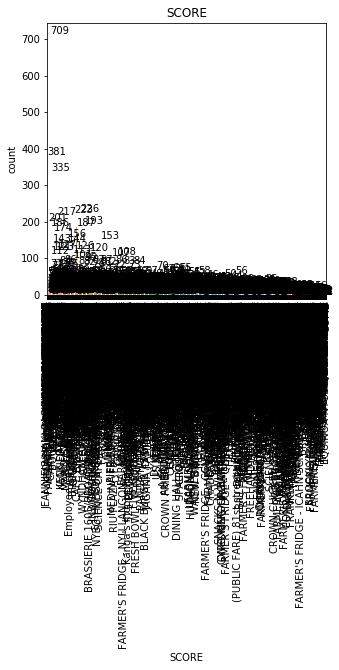

In [74]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='SCORE',data=df_data_1)
ax.set_title("SCORE")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

plt.xticks(rotation=90) 
plt.show()